In [20]:
from tba_session import session, ROOT_URL, TEAM_PAGES
from tba_types import Award, Event, Team
from collections import defaultdict
from tqdm.notebook import trange, tqdm
from itertools import pairwise
from typing import Generator, TypeAlias, Literal
import matplotlib.pyplot as plt

In [3]:
ALL_TEAMS: dict[str, Team] = {}

for page in trange(TEAM_PAGES, desc="Getting Teams", total=TEAM_PAGES, leave=False):
    team: Team
    for team in session.get(ROOT_URL + f"/teams/{page}").json():
        ALL_TEAMS[team["key"]] = team

Getting Teams:   0%|          | 0/22 [00:00<?, ?it/s]

In [32]:
einstein_years: dict[str, list[int]] =  defaultdict(list)
cmp_years: dict[str, list[int]] = defaultdict(list)
win_years: dict[str, list[int]] = defaultdict(list)
div_finalists: dict[str, list[int]] = defaultdict(list)
cmp_finalists: dict[str, list[int]] = defaultdict(list)
team_seasons: dict[str, set[int]] = defaultdict(set)
einstein: dict[int, set[str]] = defaultdict(set)
div_finalists_by_year: dict[int, set[str]] = defaultdict(set)

for year in trange(2001, 2026, desc="Fetching years"):
    events: list[Event] = session.get(f"{ROOT_URL}/events/{year}").json()
    for event in tqdm(events, leave=False, desc=f"Processing {year} events"):
        if event["event_type"] == 3:
            awards: list[Award] = session.get(f"{ROOT_URL}/event/{event['key']}/awards").json()
            for award in awards:
                if award["award_type"] == 1:
                    for recipient in award["recipient_list"]:
                        einstein_years[recipient["team_key"]].append(year)
                        einstein[year].add(recipient["team_key"])
                elif award["award_type"] == 2:
                    for recipient in award["recipient_list"]:
                        div_finalists[recipient["team_key"]].append(year)
                        div_finalists_by_year[year].add(recipient["team_key"])
            teams: list[str] = session.get(f"{ROOT_URL}/event/{event['key']}/teams/keys").json()
            for team_key in teams:
                cmp_years[team_key].append(year)
        elif event["event_type"] == 4:
            awards: list[Award] = session.get(f"{ROOT_URL}/event/{event['key']}/awards").json()
            for award in awards:
                if award["award_type"] == 1:
                    for recipient in award["recipient_list"]:
                        win_years[recipient["team_key"]].append(year)
                elif award["award_type"] == 2:
                    for recipient in award["recipient_list"]:
                        cmp_finalists[recipient["team_key"]].append(year)
        elif event["event_type"] <= 6 and event["year"] != 2020 and event["year"] != 2021:
            teams: list[str] = session.get(f"{ROOT_URL}/event/{event['key']}/teams/keys").json()
            for team_key in teams:
                team_seasons[team_key].add(year)

Fetching years:   0%|          | 0/25 [00:00<?, ?it/s]

Processing 2001 events:   0%|          | 0/18 [00:00<?, ?it/s]

Processing 2002 events:   0%|          | 0/22 [00:00<?, ?it/s]

Processing 2003 events:   0%|          | 0/28 [00:00<?, ?it/s]

Processing 2004 events:   0%|          | 0/32 [00:00<?, ?it/s]

Processing 2005 events:   0%|          | 0/37 [00:00<?, ?it/s]

Processing 2006 events:   0%|          | 0/40 [00:00<?, ?it/s]

Processing 2007 events:   0%|          | 0/45 [00:00<?, ?it/s]

Processing 2008 events:   0%|          | 0/54 [00:00<?, ?it/s]

Processing 2009 events:   0%|          | 0/57 [00:00<?, ?it/s]

Processing 2010 events:   0%|          | 0/58 [00:00<?, ?it/s]

Processing 2011 events:   0%|          | 0/68 [00:00<?, ?it/s]

Processing 2012 events:   0%|          | 0/82 [00:00<?, ?it/s]

Processing 2013 events:   0%|          | 0/129 [00:00<?, ?it/s]

Processing 2014 events:   0%|          | 0/166 [00:00<?, ?it/s]

Processing 2015 events:   0%|          | 0/181 [00:00<?, ?it/s]

Processing 2016 events:   0%|          | 0/203 [00:00<?, ?it/s]

Processing 2017 events:   0%|          | 0/256 [00:00<?, ?it/s]

Processing 2018 events:   0%|          | 0/278 [00:00<?, ?it/s]

Processing 2019 events:   0%|          | 0/303 [00:00<?, ?it/s]

Processing 2020 events:   0%|          | 0/196 [00:00<?, ?it/s]

Processing 2021 events:   0%|          | 0/259 [00:00<?, ?it/s]

Processing 2022 events:   0%|          | 0/288 [00:00<?, ?it/s]

Processing 2023 events:   0%|          | 0/309 [00:00<?, ?it/s]

Processing 2024 events:   0%|          | 0/323 [00:00<?, ?it/s]

Processing 2025 events:   0%|          | 0/222 [00:00<?, ?it/s]

In [5]:
print ("| # | Team Number | Team Name | First Year | Second Year | Gap |")
print( "| --- | --- | --- | --- | --- | --- |")

for idx, vals in enumerate(sorted(
    (
        (team_key, comp_years[0], comp_years[1], comp_years[1] - comp_years[0])
        for team_key, comp_years in einstein_years.items()
        if len(comp_years) >= 2
        for comp_years in pairwise(sorted(comp_years))
    ),
    key=lambda x: x[3],
    reverse=True
)[:25], start=1):
    team_key, first, second, gap = vals
    team = ALL_TEAMS[team_key]
    print(
        f"| {idx} | {team['team_number']} | {team['nickname']} | "
        f"{first} | {second} | {gap} year gap |"
    )

| # | Team Number | Team Name | First Year | Second Year | Gap |
| --- | --- | --- | --- | --- | --- |
| 1 | 59 | RamTech | 2001 | 2023 | 22 year gap |
| 2 | 190 | Gompei and the HERD | 2007 | 2024 | 17 year gap |
| 3 | 125 | NUTRONs | 2001 | 2017 | 16 year gap |
| 4 | 294 | Beach Cities Robotics | 2010 | 2024 | 14 year gap |
| 5 | 494 | Martians | 2004 | 2018 | 14 year gap |
| 6 | 302 | The Dragons | 2003 | 2017 | 14 year gap |
| 7 | 868 | TechHOUNDS | 2004 | 2018 | 14 year gap |
| 8 | 144 | Operation Orange | 2002 | 2015 | 13 year gap |
| 9 | 180 | S.P.A.M. | 2012 | 2025 | 13 year gap |
| 10 | 16 | Bomb Squad | 2012 | 2025 | 13 year gap |
| 11 | 179 | Children of the Swamp | 2007 | 2019 | 12 year gap |
| 12 | 118 | Robonauts | 2002 | 2012 | 10 year gap |
| 13 | 180 | S.P.A.M. | 2002 | 2012 | 10 year gap |
| 14 | 1218 | SCH Robotics | 2009 | 2019 | 10 year gap |
| 15 | 195 | CyberKnights | 2006 | 2016 | 10 year gap |
| 16 | 971 | Spartan Robotics | 2009 | 2019 | 10 year gap |
| 17 | 1

In [6]:
print ("| # | Team Number | Team Name | Number of Championship Appearances |")
print( "| --- | --- | --- | --- |")

for idx, (team_key, years) in enumerate(
    sorted(
        ((team_key, len(years)) for team_key, years in cmp_years.items() if len(years) > 0 and team_key not in einstein_years),
        key=lambda x: x[1],
        reverse=True
    )[:15], start=1
):
    team = ALL_TEAMS[team_key]
    print(
        f"| {idx} | {team['team_number']} | {team['nickname']} | "
        f"{years} appearances |"
    )

| # | Team Number | Team Name | Number of Championship Appearances |
| --- | --- | --- | --- |
| 1 | 45 | TechnoKats Robotics Team | 20 appearances |
| 2 | 399 | Eagle Robotics | 19 appearances |
| 3 | 103 | Cybersonics | 19 appearances |
| 4 | 176 | Aces High | 18 appearances |
| 5 | 11 | MORT | 18 appearances |
| 6 | 88 | TJ² | 18 appearances |
| 7 | 126 | Gael Force | 17 appearances |
| 8 | 191 | X-CATS | 17 appearances |
| 9 | 1538 | The Holy Cows | 17 appearances |
| 10 | 1629 | Garrett Coalition (GaCo) | 17 appearances |
| 11 | 573 | Mech Warriors | 16 appearances |
| 12 | 842 | Falcon Robotics | 16 appearances |
| 13 | 836 | The RoboBees | 16 appearances |
| 14 | 1305 | Ice Cubed | 16 appearances |
| 15 | 1816 | "The Green Machine" | 16 appearances |


In [7]:
print("| # | Team Number | Team Name | Division Finalists |")
print("| --- | --- | --- | --- |")
for idx, (team_key, years) in enumerate(
    sorted(
        (
            (team_key, len(years))
            for team_key, years in div_finalists.items()
            if len(years) > 0 and team_key not in einstein_years
        ),
        key=lambda x: x[1],
        reverse=True,
    )[:25],
    start=1,
):
    team = ALL_TEAMS[team_key]
    print(
        f"| {idx} | {team['team_number']} | [{team['nickname']}](https://thebluealliance.com/team/{team["team_number"]}) | "
        f"{years} times |"
    )

| # | Team Number | Team Name | Division Finalists |
| --- | --- | --- | --- |
| 1 | 1756 | [Argos](https://thebluealliance.com/team/1756) | 6 times |
| 2 | 1718 | [The Fighting Pi](https://thebluealliance.com/team/1718) | 4 times |
| 3 | 135 | [Penn Robotics Black Knights](https://thebluealliance.com/team/135) | 3 times |
| 4 | 141 | [WOBOT](https://thebluealliance.com/team/141) | 3 times |
| 5 | 329 | [Mohawks](https://thebluealliance.com/team/329) | 3 times |
| 6 | 176 | [Aces High](https://thebluealliance.com/team/176) | 3 times |
| 7 | 1538 | [The Holy Cows](https://thebluealliance.com/team/1538) | 3 times |
| 8 | 3663 | [CPR - Cedar Park Robotics](https://thebluealliance.com/team/3663) | 3 times |
| 9 | 2468 | [Team Appreciate](https://thebluealliance.com/team/2468) | 3 times |
| 10 | 422 | [The Mech Tech Dragons](https://thebluealliance.com/team/422) | 3 times |
| 11 | 4028 | [The Beak Squad](https://thebluealliance.com/team/4028) | 3 times |
| 12 | 267 | [Demolition Squad](http

In [8]:
print("| # | Team Number | Team Name | Einstein/Worlds |")
print("| --- | --- | --- | --- |")

for idx, (team_key, ratio) in enumerate(
    sorted(
        ((team_key, len(einstein_years[team_key]) / len(cmp_years[team_key]))
         for team_key in cmp_years if team_key in einstein_years and len(cmp_years[team_key]) > 2),
        key=lambda x: x[1],
        reverse=True
    )[:15], start=1
):
    team = ALL_TEAMS[team_key]
    print(
        f"| {idx} | {team['team_number']} | [{team['nickname']}](https://thebluealliance.com/team/{team["team_number"]}) | "
        f"{ratio*100:.2f}% |"
    )

| # | Team Number | Team Name | Einstein/Worlds |
| --- | --- | --- | --- |
| 1 | 1678 | [Citrus Circuits](https://thebluealliance.com/team/1678) | 76.92% |
| 2 | 3707 | [TechnoDogs](https://thebluealliance.com/team/3707) | 66.67% |
| 3 | 4414 | [HighTide](https://thebluealliance.com/team/4414) | 60.00% |
| 4 | 64 | [Gila Monsters](https://thebluealliance.com/team/64) | 50.00% |
| 5 | 5026 | [Iron Panthers](https://thebluealliance.com/team/5026) | 50.00% |
| 6 | 217 | [ThunderChickens](https://thebluealliance.com/team/217) | 47.37% |
| 7 | 2056 | [OP Robotics](https://thebluealliance.com/team/2056) | 47.06% |
| 8 | 254 | [The Cheesy Poofs](https://thebluealliance.com/team/254) | 45.45% |
| 9 | 3476 | [Code Orange](https://thebluealliance.com/team/3476) | 45.45% |
| 10 | 144 | [Operation Orange](https://thebluealliance.com/team/144) | 42.86% |
| 11 | 6328 | [Mechanical Advantage](https://thebluealliance.com/team/6328) | 42.86% |
| 12 | 973 | [Greybots](https://thebluealliance.com/team/9

In [9]:
print("| # | Team Number | Team Name | Einstein/Total |")
print("| --- | --- | --- | --- |")

for idx, (team_key, ratio) in enumerate(
    sorted(
        ((team_key, len(einstein_years[team_key]) / len(team_seasons[team_key]))
         for team_key in cmp_years if team_key in einstein_years and len(team_seasons[team_key]) > 2),
        key=lambda x: x[1],
        reverse=True
    )[:15], start=1
):
    team = ALL_TEAMS[team_key]
    print(
        f"| {idx} | {team['team_number']} | [{team['nickname']}](https://thebluealliance.com/team/{team["team_number"]}) | "
        f"{ratio*100:.2f}% |"
    )

| # | Team Number | Team Name | Einstein/Total |
| --- | --- | --- | --- |
| 1 | 4414 | [HighTide](https://thebluealliance.com/team/4414) | 60.00% |
| 2 | 1678 | [Citrus Circuits](https://thebluealliance.com/team/1678) | 52.63% |
| 3 | 2056 | [OP Robotics](https://thebluealliance.com/team/2056) | 47.06% |
| 4 | 254 | [The Cheesy Poofs](https://thebluealliance.com/team/254) | 43.48% |
| 5 | 6328 | [Mechanical Advantage](https://thebluealliance.com/team/6328) | 42.86% |
| 6 | 64 | [Gila Monsters](https://thebluealliance.com/team/64) | 40.00% |
| 7 | 217 | [ThunderChickens](https://thebluealliance.com/team/217) | 39.13% |
| 8 | 3476 | [Code Orange](https://thebluealliance.com/team/3476) | 38.46% |
| 9 | 6986 | [PPT Bots](https://thebluealliance.com/team/6986) | 33.33% |
| 10 | 9072 | [TigerBots](https://thebluealliance.com/team/9072) | 33.33% |
| 11 | 9312 | [NERD Spark](https://thebluealliance.com/team/9312) | 33.33% |
| 12 | 987 | [HIGHROLLERS](https://thebluealliance.com/team/987) | 31

In [10]:
print("| # | Team Number | Team Name | Wins/Worlds |")

for idx, (team_key, ratio) in enumerate(
    sorted(
        ((team_key, len(win_years[team_key]) / len(cmp_years[team_key]))
         for team_key in cmp_years if team_key in win_years and len(cmp_years[team_key]) > 2),
        key=lambda x: x[1],
        reverse=True
    )[:25], start=1
):
    team = ALL_TEAMS[team_key]
    print(
        f"| {idx} | {team['team_number']} | [{team['nickname']}](https://thebluealliance.com/team/{team["team_number"]}) | "
        f"{ratio*100:.2f}% |"
    )

| # | Team Number | Team Name | Wins/Worlds |
| 1 | 5026 | [Iron Panthers](https://thebluealliance.com/team/5026) | 50.00% |
| 2 | 3707 | [TechnoDogs](https://thebluealliance.com/team/3707) | 33.33% |
| 3 | 5499 | [Bearium](https://thebluealliance.com/team/5499) | 25.00% |
| 4 | 4272 | [Maverick Robotics](https://thebluealliance.com/team/4272) | 25.00% |
| 5 | 4096 | [Ctrl-Z](https://thebluealliance.com/team/4096) | 25.00% |
| 6 | 2976 | [The Spartabots](https://thebluealliance.com/team/2976) | 25.00% |
| 7 | 254 | [The Cheesy Poofs](https://thebluealliance.com/team/254) | 22.73% |
| 8 | 71 | [Team Hammond](https://thebluealliance.com/team/71) | 20.00% |
| 9 | 973 | [Greybots](https://thebluealliance.com/team/973) | 20.00% |
| 10 | 2767 | [Stryke Force](https://thebluealliance.com/team/2767) | 20.00% |
| 11 | 3075 | [Ha-Dream Team](https://thebluealliance.com/team/3075) | 20.00% |
| 12 | 2928 | [Viking Robotics](https://thebluealliance.com/team/2928) | 20.00% |
| 13 | 5012 | [Gryffinge

In [11]:
print("| # | Team Number | Team Name | Wins/Total |")

for idx, (team_key, ratio) in enumerate(
    sorted(
        ((team_key, len(win_years[team_key]) / len(team_seasons[team_key]))
         for team_key in cmp_years if team_key in win_years and len(team_seasons[team_key]) > 2),
        key=lambda x: x[1],
        reverse=True
    )[:25], start=1
):
    team = ALL_TEAMS[team_key]
    print(
        f"| {idx} | {team['team_number']} | [{team['nickname']}](https://thebluealliance.com/team/{team["team_number"]}) | "
        f"{ratio*100:.2f}% |"
    )

| # | Team Number | Team Name | Wins/Total |
| 1 | 254 | [The Cheesy Poofs](https://thebluealliance.com/team/254) | 21.74% |
| 2 | 5026 | [Iron Panthers](https://thebluealliance.com/team/5026) | 20.00% |
| 3 | 4414 | [HighTide](https://thebluealliance.com/team/4414) | 20.00% |
| 4 | 5499 | [Bearium](https://thebluealliance.com/team/5499) | 16.67% |
| 5 | 2708 | [Lake Effect Robotics](https://thebluealliance.com/team/2708) | 16.67% |
| 6 | 1323 | [MadTown Robotics](https://thebluealliance.com/team/1323) | 15.00% |
| 7 | 6672 | [Fusion Corps](https://thebluealliance.com/team/6672) | 14.29% |
| 8 | 973 | [Greybots](https://thebluealliance.com/team/973) | 13.64% |
| 9 | 2767 | [Stryke Force](https://thebluealliance.com/team/2767) | 13.33% |
| 10 | 111 | [WildStang](https://thebluealliance.com/team/111) | 13.04% |
| 11 | 217 | [ThunderChickens](https://thebluealliance.com/team/217) | 13.04% |
| 12 | 71 | [Team Hammond](https://thebluealliance.com/team/71) | 13.04% |
| 13 | 67 | [The HOT Tea

In [12]:
def streaks(team_key: str) -> Generator[tuple[int, int, int], None, None]:
    iterator = iter(cmp_years[team_key])
    end_year = start_year = 0
    for year in iterator:
        if (
            end_year == 0 or year == end_year + 1 or (year == 2022 and end_year == 2019)
        ) and year not in einstein_years[team_key]:
            if start_year == 0:
                start_year = year
            end_year = year
            continue
        if year not in einstein_years[team_key]:
            start_year = end_year = year
        else:
            start_year = end_year = 0
        yield start_year, end_year, (end_year - start_year - 1 if start_year <= 2019 and end_year >= 2022 else end_year - start_year + 1)
    if start_year != end_year:
        yield start_year, end_year, (end_year - start_year - 1 if start_year <= 2019 and end_year >= 2022 else end_year - start_year + 1)

print("| # | Team Number | Team Name | Streak Years | Streak Length |")
print("| --- | --- | --- | --- | --- |")

for idx, (team_key, (start_year, end_year, length)) in enumerate(
    sorted(
        ((team_key, streak) for team_key in cmp_years for streak in streaks(team_key)),
        key=lambda x: x[1][2],
        reverse=True,
    )[:25],
    start=1,
):
    team = ALL_TEAMS[team_key]
    print(
        f"| {idx} | {team['team_number']} | [{team['nickname']}](https://thebluealliance.com/team/{team["team_number"]}) | "
        f"{start_year}-{end_year} | {length} seasons |"
    )

print()
print("| # | Team Number | Team Name | Start Year | Streak Length |")
print("| --- | --- | --- | --- | --- |")

for idx, (team_key, (start_year, end_year, length)) in enumerate(
    sorted(
        ((team_key, streak) for team_key in cmp_years for streak in streaks(team_key) if streak[1] == 2025),
        key=lambda x: x[1][2],
        reverse=True,
    )[:25],
    start=1,
):
    team = ALL_TEAMS[team_key]
    print(
        f"| {idx} | {team['team_number']} | [{team['nickname']}](https://thebluealliance.com/team/{team["team_number"]}) | "
        f"{start_year} | {length} seasons |"
    )

| # | Team Number | Team Name | Streak Years | Streak Length |
| --- | --- | --- | --- | --- |
| 1 | 365 | [Miracle Workerz](https://thebluealliance.com/team/365) | 2002-2025 | 22 seasons |
| 2 | 341 | [Miss Daisy](https://thebluealliance.com/team/341) | 2004-2025 | 20 seasons |
| 3 | 126 | [Gael Force](https://thebluealliance.com/team/126) | 2003-2019 | 17 seasons |
| 4 | 191 | [X-CATS](https://thebluealliance.com/team/191) | 2003-2019 | 17 seasons |
| 5 | 503 | [25 Years of Frog Force](https://thebluealliance.com/team/503) | 2007-2025 | 17 seasons |
| 6 | 236 | [Techno-Ticks](https://thebluealliance.com/team/236) | 2004-2019 | 16 seasons |
| 7 | 1305 | [Ice Cubed](https://thebluealliance.com/team/1305) | 2004-2019 | 16 seasons |
| 8 | 1538 | [The Holy Cows](https://thebluealliance.com/team/1538) | 2008-2025 | 16 seasons |
| 9 | 1629 | [Garrett Coalition (GaCo)](https://thebluealliance.com/team/1629) | 2008-2025 | 16 seasons |
| 10 | 2486 | [CocoNuts](https://thebluealliance.com/team/

In [13]:
for team_key, last in sorted(
    (
        (team_key, comp_years[-1])
        for team_key, comp_years in einstein_years.items()
        if len(comp_years) >= 1
    ),
    key=lambda x: x[1],
)[:20]:
    team = ALL_TEAMS[team_key]
    print(f"{team['team_number']:>4} {team['nickname']:<30} {last:>4} (last competed)")

 349 Team 349                       2001 (last competed)
  75 RoboRaiders                    2001 (last competed)
  85 B.O.B. (Built on Brains)       2001 (last competed)
 115 MVRT                           2001 (last competed)
  53 Area 53                        2001 (last competed)
 122 NASA Knights                   2001 (last competed)
 279 Tech Fusion                    2001 (last competed)
 365 Miracle Workerz                2001 (last competed)
 308 Monsters                       2002 (last competed)
 311 Red Jammers                    2002 (last competed)
  66 Grizzly Robotics               2002 (last competed)
  65 The Huskie Brigade             2003 (last competed)
 343 Metal-In-Motion                2003 (last competed)
 236 Techno-Ticks                   2003 (last competed)
 341 Miss Daisy                     2003 (last competed)
 292 PantherTech                    2003 (last competed)
 378 The Circuit Stompers           2003 (last competed)
 340 G.R.R. (Greater Rochester 

In [22]:
District: TypeAlias = Literal[
    "fsc",  # FIRST South Carolina
    "fnc",  # FIRST North Carolina
    "ne",  # New England
    "ont",  # Ontario
    "pnw",  # Pacific Northwest
    "fit",  # FIRST in Texas
    "fim",  # FIRST in Michigan
    "fin",  # FIRST in Indiana
    "fma",  # FIRST Mid-Atlantic
    "pch",  # Peach State
    "chs",  # Chesapeake
    "isr",
]

district_to_first_year: dict[District, int] = {
    "fsc": 2025,
    "chs": 2016,
    "isr": 2017,
    "pch": 2016,
    "ne": 2015,
    "fma": 2012,
    "fim": 2009,
    "fin": 2015,
    "fnc": 2016,
    "pnw": 2014,
    "ont": 2017,
    "fit": 2019,
}

district_to_name: dict[District, str] = {
    "fsc": "FIRST South Carolina",
    "fnc": "FIRST North Carolina",
    "ne": "New England",
    "ont": "Ontario",
    "pnw": "Pacific Northwest",
    "fit": "FIRST in Texas",
    "fim": "FIRST in Michigan",
    "fin": "FIRST in Indiana",
    "fma": "FIRST Mid-Atlantic",
    "pch": "Peachtree",
    "chs": "Chesapeake",
    "isr": "FIRST Israel",
}

district_teams: dict[int, set[str]] = defaultdict(set)

for district in tqdm(district_to_first_year):
    for year in trange(
        district_to_first_year[district],
        2026,
        desc=f"Fetching {district_to_name[district]} teams",
        leave=False,
    ):
        teams: list[str] = session.get(
            f"{ROOT_URL}/district/{year}{district}/teams/keys"
        ).json()
        district_teams[year].update(teams)

teams_that_year: dict[int, set[str]] = defaultdict(set)

for year in trange(2001, 2026, desc="Getting Teams by Year"):
    teams_that_year[year] = set()
    for page in trange(TEAM_PAGES, desc=f"Getting Teams for {year}", leave=False):
        teams: list[str] = session.get(ROOT_URL + f"/teams/{year}/{page}/keys").json()
        teams_that_year[year].update(teams)

  0%|          | 0/12 [00:00<?, ?it/s]

Fetching FIRST South Carolina teams:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching Chesapeake teams:   0%|          | 0/10 [00:00<?, ?it/s]

Fetching FIRST Israel teams:   0%|          | 0/9 [00:00<?, ?it/s]

Fetching Peachtree teams:   0%|          | 0/10 [00:00<?, ?it/s]

Fetching New England teams:   0%|          | 0/11 [00:00<?, ?it/s]

Fetching FIRST Mid-Atlantic teams:   0%|          | 0/14 [00:00<?, ?it/s]

Fetching FIRST in Michigan teams:   0%|          | 0/17 [00:00<?, ?it/s]

Fetching FIRST in Indiana teams:   0%|          | 0/11 [00:00<?, ?it/s]

Fetching FIRST North Carolina teams:   0%|          | 0/10 [00:00<?, ?it/s]

Fetching Pacific Northwest teams:   0%|          | 0/12 [00:00<?, ?it/s]

Fetching Ontario teams:   0%|          | 0/9 [00:00<?, ?it/s]

Fetching FIRST in Texas teams:   0%|          | 0/7 [00:00<?, ?it/s]

Getting Teams by Year:   0%|          | 0/25 [00:00<?, ?it/s]

Getting Teams for 2001:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2002:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2003:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2004:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2005:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2006:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2007:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2008:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2009:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2010:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2011:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2012:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2013:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2014:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2015:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2016:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2017:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2018:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2019:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2020:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2021:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2022:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2023:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2024:   0%|          | 0/22 [00:00<?, ?it/s]

Getting Teams for 2025:   0%|          | 0/22 [00:00<?, ?it/s]

In [27]:
cali = {key for key, team in ALL_TEAMS.items() if team["state_prov"] == "CA" or team["state_prov"] == "California"}

Text(0, 0.5, 'Percentage')

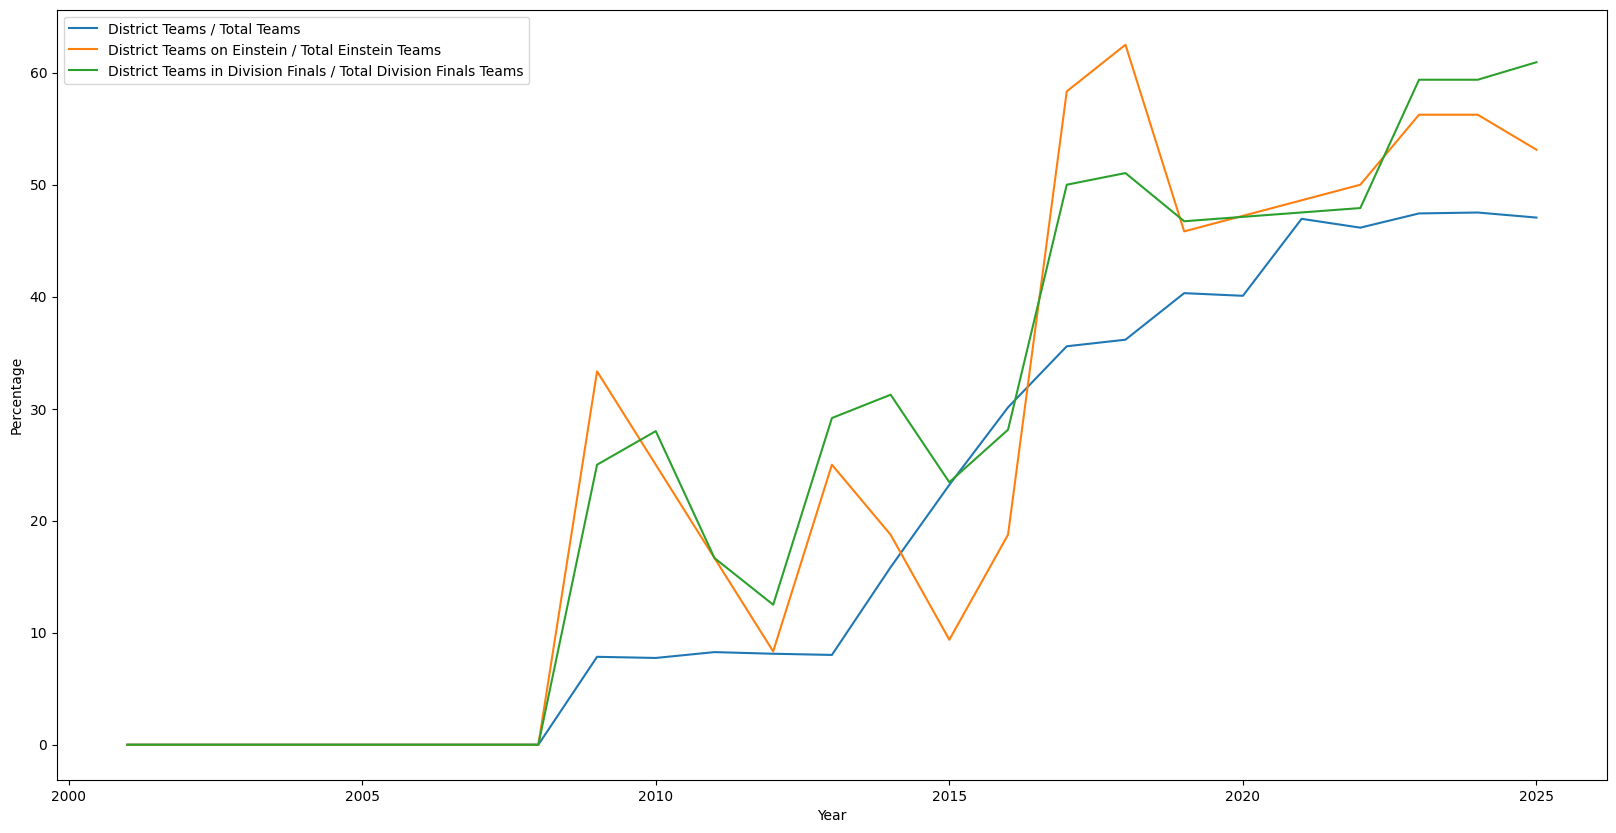

In [33]:
plt.rcParams["figure.figsize"] = (20, 10)

plt.plot(
    list(range(2001, 2026)),
    [
        len(district_teams[year]) / len(teams_that_year[year]) * 100
        for year in range(2001, 2026)
    ],
    label="District Teams / Total Teams",
)

plt.plot(
    [year for year in range(2001, 2026) if einstein[year]],
    [
        sum(team_key in district_teams[year] for team_key in einstein[year])
        / len(einstein[year])
        * 100
        for year in range(2001, 2026)
        if einstein[year]
    ],
    label="District Teams on Einstein / Total Einstein Teams",
)

plt.plot(
    [year for year in range(2001, 2026) if einstein[year]],
    [
        sum(team_key in district_teams[year] for team_key in einstein[year] | div_finalists_by_year[year])
        / len(einstein[year] | div_finalists_by_year[year])
        * 100
        for year in range(2001, 2026)
        if einstein[year]
    ],
    label="District Teams in Division Finals / Total Division Finals Teams",
)

plt.legend()
plt.xlabel("Year")
plt.ylabel("Percentage")